In [1]:
# Importing Libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd

In [2]:
# Importing Data

Aswi = (pd.read_csv('Asawari.csv', header=None)/255.0).values
Bhrv = (pd.read_csv('Bhairav.csv', header=None)/255.0).values
Bhvi = (pd.read_csv('Bhairavi.csv', header=None)/255.0).values
Blwl = (pd.read_csv('Bilawal.csv', header=None)/255.0).values
Kafi = (pd.read_csv('Kafi.csv', header=None)/255.0).values
Klyn = (pd.read_csv('Kalyan.csv', header=None)/255.0).values
Khmj = (pd.read_csv('Khamaj.csv', header=None)/255.0).values
Mrwa = (pd.read_csv('Marwa.csv', header=None)/255.0).values
Prvi = (pd.read_csv('Poorvi.csv', header=None)/255.0).values
Todi = (pd.read_csv('Todi.csv', header=None)/255.0).values

Aswi_A = (pd.read_csv('Asawari_A.csv', header=None)/255.0).values
Bhrv_A = (pd.read_csv('Bhairav_A.csv', header=None)/255.0).values
Bhvi_A = (pd.read_csv('Bhairavi_A.csv', header=None)/255.0).values
Blwl_A = (pd.read_csv('Bilawal_A.csv', header=None)/255.0).values
Kafi_A = (pd.read_csv('Kafi_A.csv', header=None)/255.0).values
Klyn_A = (pd.read_csv('Kalyan_A.csv', header=None)/255.0).values
Khmj_A = (pd.read_csv('Khamaj_A.csv', header=None)/255.0).values
Mrwa_A = (pd.read_csv('Marwa_A.csv', header=None)/255.0).values
Prvi_A = (pd.read_csv('Poorvi_A.csv', header=None)/255.0).values
Todi_A = (pd.read_csv('Todi_A.csv', header=None)/255.0).values

Aswi_B = (pd.read_csv('Asawari_B.csv', header=None)/255.0).values
Bhrv_B = (pd.read_csv('Bhairav_B.csv', header=None)/255.0).values
Bhvi_B = (pd.read_csv('Bhairavi_B.csv', header=None)/255.0).values
Blwl_B = (pd.read_csv('Bilawal_B.csv', header=None)/255.0).values
Kafi_B = (pd.read_csv('Kafi_B.csv', header=None)/255.0).values
Klyn_B = (pd.read_csv('Kalyan_B.csv', header=None)/255.0).values
Khmj_B = (pd.read_csv('Khamaj_B.csv', header=None)/255.0).values
Mrwa_B = (pd.read_csv('Marwa_B.csv', header=None)/255.0).values
Prvi_B = (pd.read_csv('Poorvi_B.csv', header=None)/255.0).values
Todi_B = (pd.read_csv('Todi_B.csv', header=None)/255.0).values

In [3]:
# Helper function that converts RGB values to HSV. Sorts the colours based on the hue. Converts them back to RGB.

def hue_sort(colours):    
    HSV = clr.hsv_to_rgb(np.sort(clr.rgb_to_hsv(colours), axis=0))
    return HSV

In [4]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plotter function for colour gradients

def plot_color_gradients(cmap_list, names, Title):
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.2) * 0.2
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh)
    axs[0].set_title(Title, fontsize=20)
    
    # Creates a "colourmap" of the supplied colours and plots that as a gradient w/ labels but w/o any axis or ticks
    
    for ax, cmap, name in zip(axs, cmap_list, names):
        ax.imshow(gradient, aspect='auto', cmap=clr.LinearSegmentedColormap.from_list("mycmap", cmap))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=12, transform=ax.transAxes)
    for ax in axs:
        ax.set_axis_off()
        
    # Code below used for exporting produced figures
    
    #plt.savefig(Title,dpi=1200)

In [5]:
# List of all Thaats' colour list in circular order with Bhairav seperated by a list containing only white

L = [Bhrv, [(1,1,1), (1,1,1)], Klyn, Blwl, Khmj, Kafi, Aswi, Bhvi, Todi, Prvi, Mrwa]

# Colours chosen by participants in each Thaat are sorted by hue to aid comparison

Maps = [hue_sort(x) for x in L]

# The white only row is labelled blank

Names = ['Bhrv', '   ', 'Klyn', 'Blwl', 'Khmj', 'Kafi', 'Aswi', 'Bhvi', 'Todi', 'Prvi', 'Mrwa']

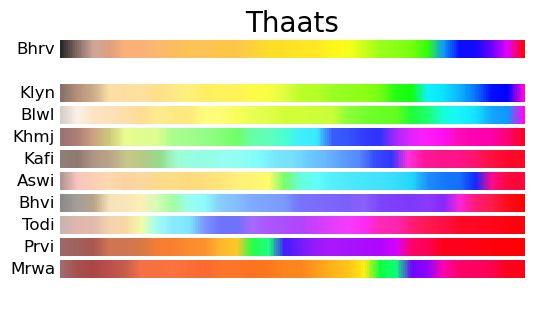

In [6]:
plot_color_gradients(Maps, Names, 'Thaats')

In [7]:
# Function that creates a base image for the heat maps with a Size x Size base or canvas, where Size is given by user

def base(Size): 
    Canvas = np.zeros((Size+1,Size+1,3))
    for i in range (0,Size+1):
        for j in range (0,Size+1):
            
            # Calculates the angle for each (x,y) coordinate w.r.t. X axis and scales it to vary from 0 to 1 (rather than 360)
            
            Angle = np.arctan2((j-(Size/2)),(i-(Size/2)))/(2*np.pi)
            if Angle < 0:
                Angle += 1
            Canvas[i,j,0] = Angle
            
            # Finds the distance away from the origin of each (x,y) corrdinate and scales it to vary from 0 to 1
            
            Dist = np.sqrt(np.power(i-(Size/2),2)+np.power(j-(Size/2),2))
            if Dist < Size/2: 
                Canvas[i,j,1] = 2*Dist/Size
    
    # Angle/Distance map to the Hue/Saturation of the base image respectively but brightness is left 0
    
    return Canvas

In [8]:
# A function that takes raw RGB values as input and returns (x,y) coordinates as per the "Size" of the base/canvas

def points(Size,thaat):
    
    # Converts RGB values to HSV in order to calculate Radius and Theta values in polar coordinates
    
    HSV = clr.rgb_to_hsv(thaat)
    Theta = 2*np.pi*HSV[:,0]
    Radius = HSV[:,1]*HSV[:,2]
    
    # Converting polar coordinates within unit circle to (x,y) coordinates scaled according to given Size
    
    Coords = np.zeros([len(thaat),2])
    Coords[:,0] = Radius*np.sin(Theta)
    Coords[:,1] = Radius*np.cos(Theta)
    Coords += 1
    Coords *= Size/2
    
    # The brightness values are used to scale the saturation so that darker colours map closer to white as explained in paper
    
    return Coords

In [9]:
# Helper function to create plot that aid the explaination of why chroma S*V was used instead of saturation

def Explainer(x):
    Explainer = np.zeros((1000,1000,3))
    for i in range (0,1000):
            for j in range (0,1000):
                if np.round((i*j)/62500)%2 == 1:
                    Explainer[i,j,0] = x
                    Explainer[i,j,1] = i/1000
                    Explainer[i,j,2] = j/1000
                else:
                    Explainer[i,j,0] = 0
                    Explainer[i,j,1] = 0
                    Explainer[i,j,2] = (1000-j)/1000

    plt.figure()
    plt.imshow(clr.hsv_to_rgb(Explainer))
    plt.xticks([])
    plt.yticks([])
    plt.title('S*V approximately equal')
    
    # Code below used for exporting produced figures
    
    #plt.savefig('Explainer',dpi=1200)

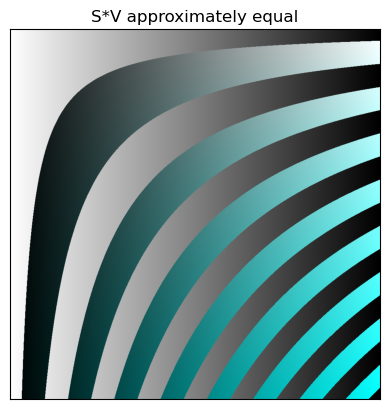

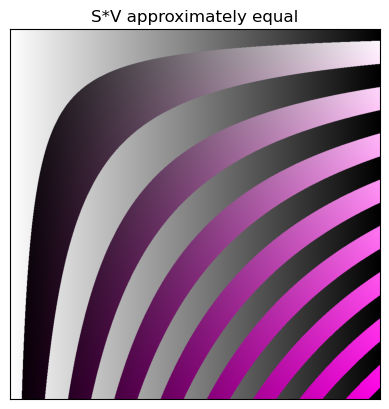

In [10]:
# Two colours plotted for better explaination

Explainer(0.5)
Explainer(0.85)

In [11]:
# Creates a meshgrid of the given size with a gaussian distibution centered at the given coordinates

def heat(Size,coord):
    x = np.arange(Size+1)
    y = np.arange(Size+1)
    X, Y = np.meshgrid(x, y)
    Z = np.exp((-((X-coord[0])**2)-((Y-coord[1])**2))/((Size/7)**2))
    
    # The (Size/7) choice for standard deviation was chosen qualitatively for best representative plots
    
    return Z

In [12]:
# Main plotter function for the heat maps

def plotter(Size,thaat,name):
    Points = points(Size,thaat)
    Base = base(Size)
    
    # Sets the brightness values for the "Base" created, by using a sum of all gaussian "heats" in a given set of coordinates
    
    for i in range(len(thaat)):
        Base[:,:,2] += heat(Size,Points[i,:])
        
    # Overall brightness values are renormalised so that they range from 0 to 1
    
    Base[:,:,2] = Base[:,:,2]/Base[:,:,2].max()
    
    # Plots a new image by converting values back to RGB. Axes are removed and plot is also labelled.
    
    plt.figure()
    plt.imshow(clr.hsv_to_rgb(Base))
    plt.xticks([])
    plt.yticks([])
    plt.title(name)
    
    # Code below used for exporting produced figures
    
    #plt.savefig(name,dpi=1200)

In [13]:
# Lists to help all further plots

List = [Bhrv, Klyn, Blwl, Khmj, Kafi, Aswi, Bhvi, Todi, Prvi, Mrwa]
List_A = [Bhrv_A, Klyn_A, Blwl_A, Khmj_A, Kafi_A, Aswi_A, Bhvi_A, Todi_A, Prvi_A, Mrwa_A]
Maps_A = [hue_sort(x) for x in List_A]
List_B = [Bhrv_B, Klyn_B, Blwl_B, Khmj_B, Kafi_B, Aswi_B, Bhvi_B, Todi_B, Prvi_B, Mrwa_B]
Maps_B = [hue_sort(x) for x in List_B]
Labels = ['Bhrv', 'Klyn', 'Blwl', 'Khmj', 'Kafi', 'Aswi', 'Bhvi', 'Todi', 'Prvi', 'Mrwa']
Labels_A = ['Bhrv_A', 'Klyn_A', 'Blwl_A', 'Khmj_A', 'Kafi_A', 'Aswi_A', 'Bhvi_A', 'Todi_A', 'Prvi_A', 'Mrwa_A']
Labels_B = ['Bhrv_B', 'Klyn_B', 'Blwl_B', 'Khmj_B', 'Kafi_B', 'Aswi_B', 'Bhvi_B', 'Todi_B', 'Prvi_B', 'Mrwa_B']

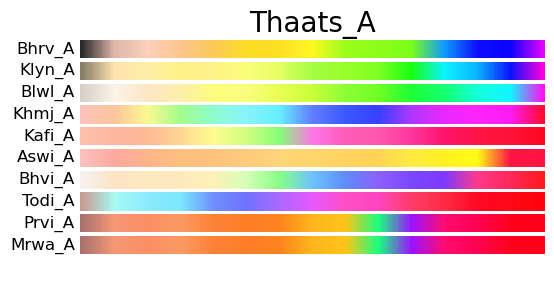

In [14]:
plot_color_gradients(Maps_A, Labels_A, 'Thaats_A')

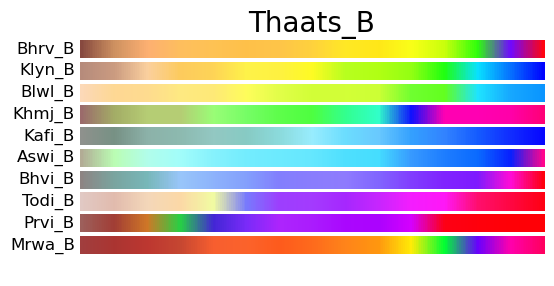

In [15]:
plot_color_gradients(Maps_B, Labels_B, 'Thaats_B')

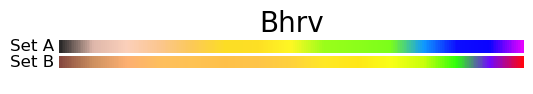

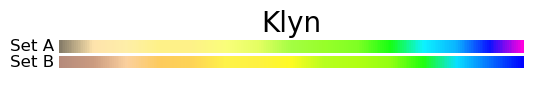

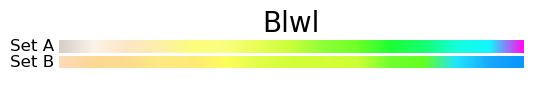

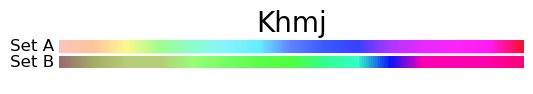

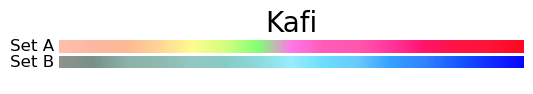

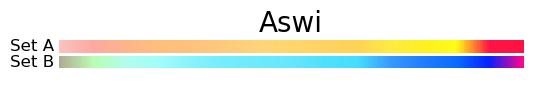

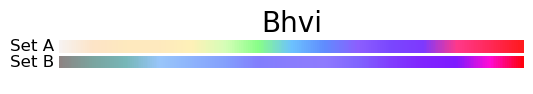

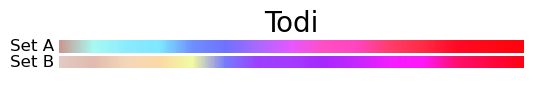

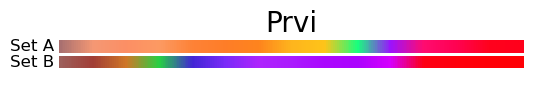

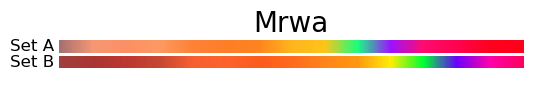

In [16]:
#Utilizing gradients plotter to display differences within Thaats of set A and set B raags

Tags = ['Set A','Set B']
for i in range(len(List)):
    Thaat = [List_A[i], List_B[i]]
    Gradient = [hue_sort(x) for x in Thaat]
    plot_color_gradients(Gradient, Tags, Labels[i])

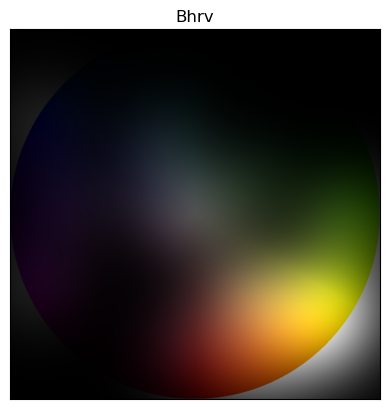

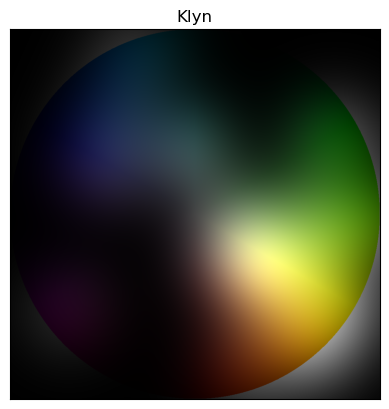

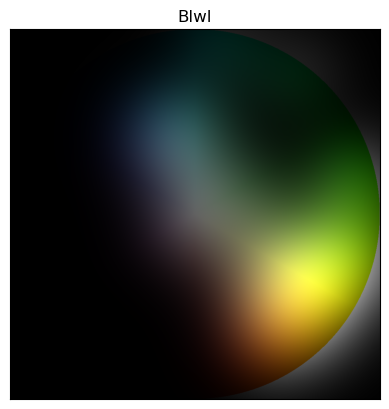

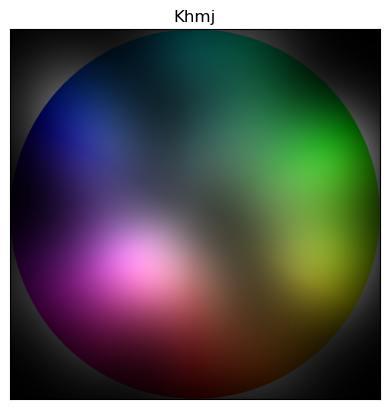

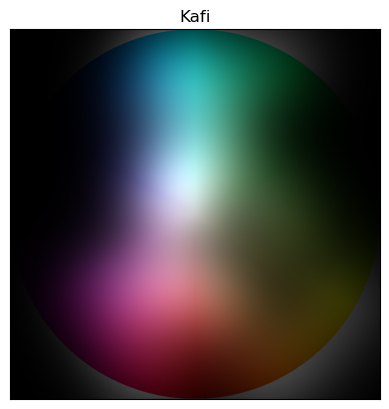

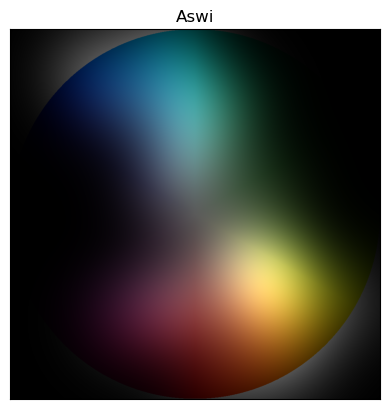

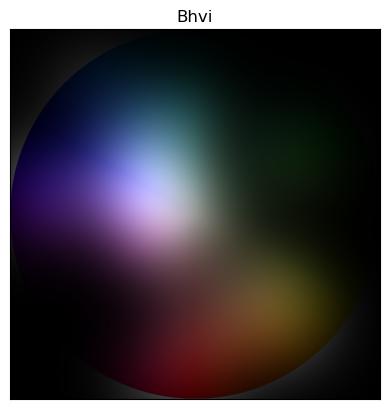

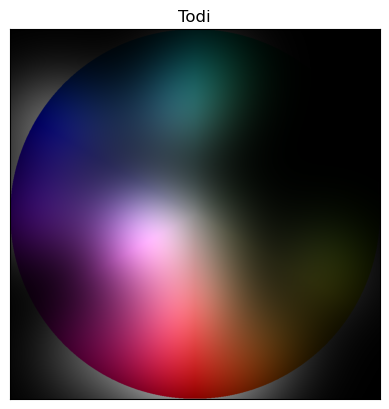

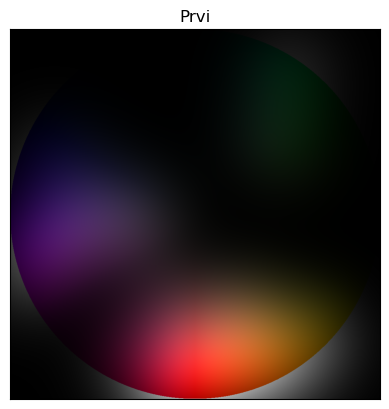

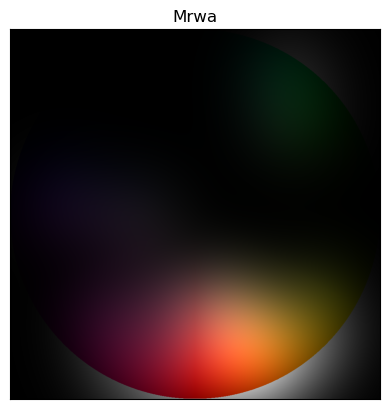

In [17]:
# Heat map plots per Thaat using plotter function

for i in range(len(List)):
    plotter(1000,List[i],Labels[i])

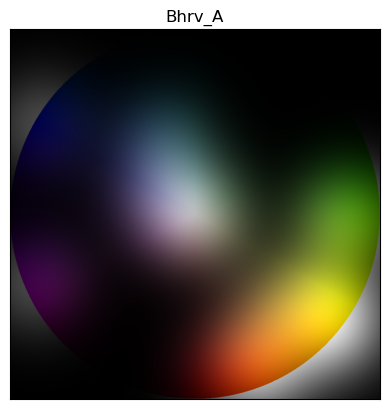

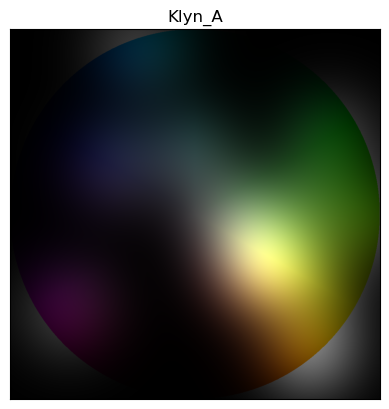

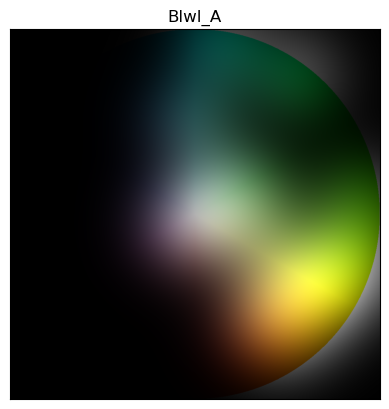

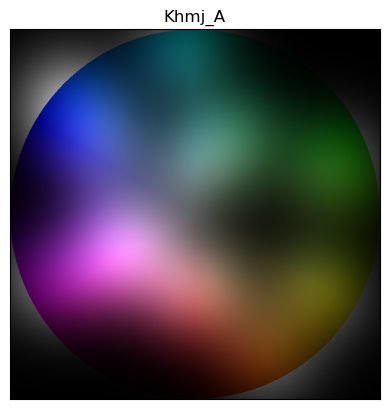

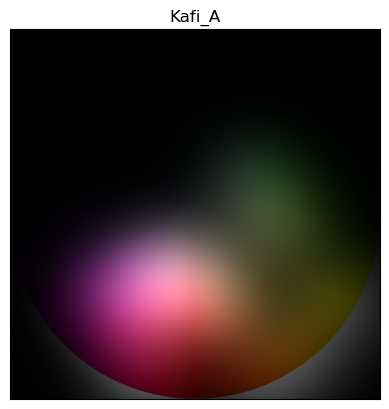

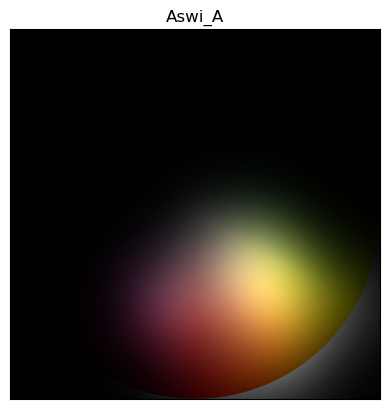

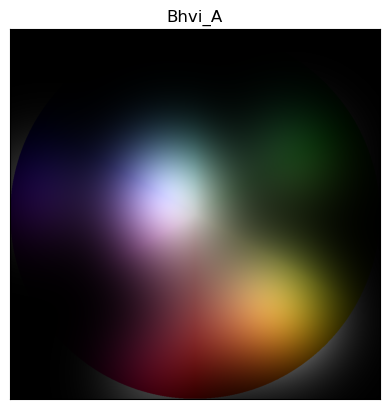

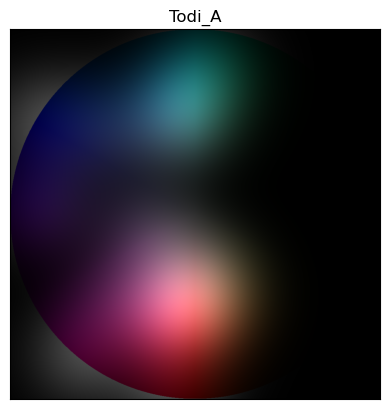

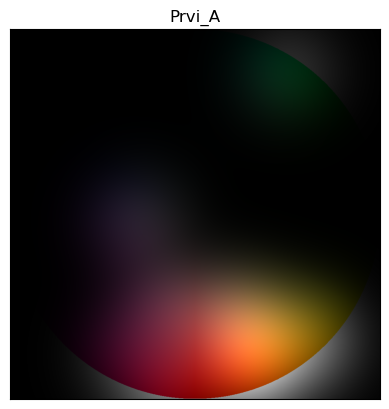

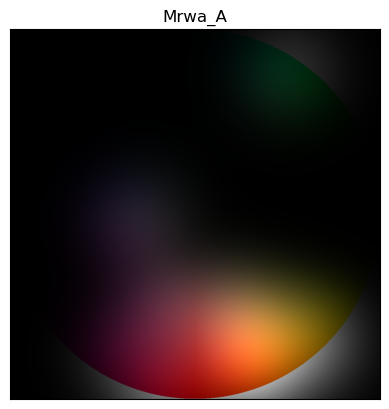

In [18]:
# Heat map plots per Thaat for Set A data using plotter function

for i in range(len(List)):
    plotter(1000,List_A[i],Labels_A[i])

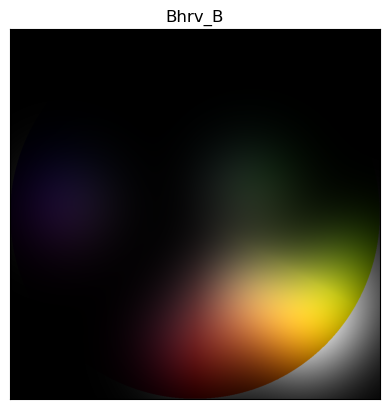

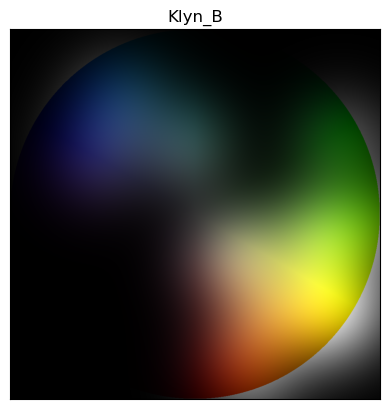

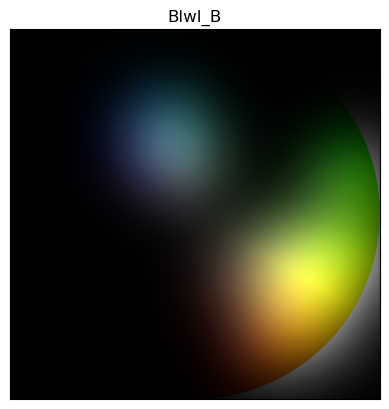

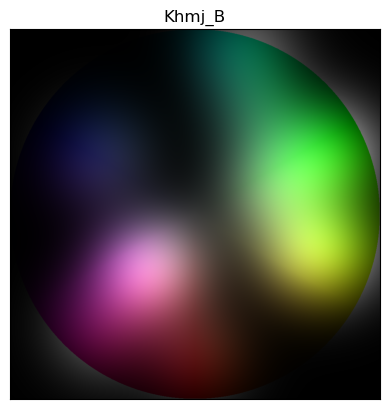

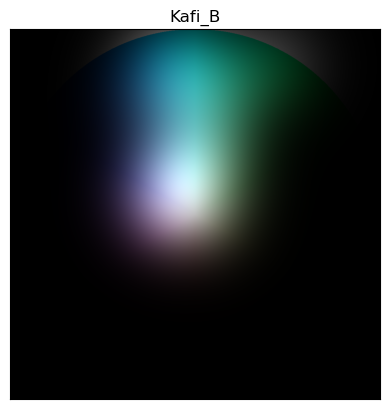

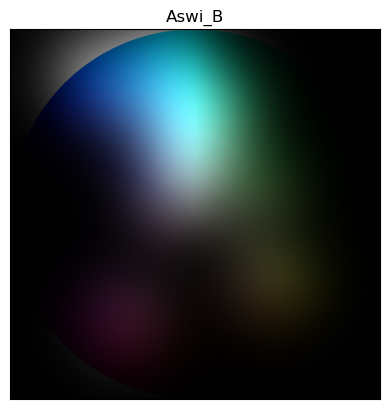

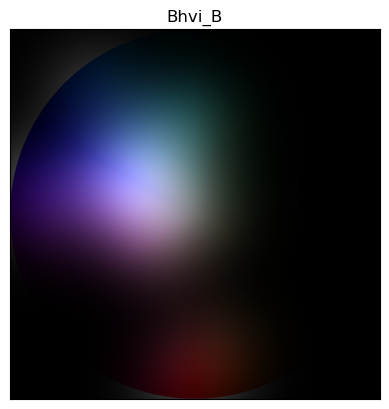

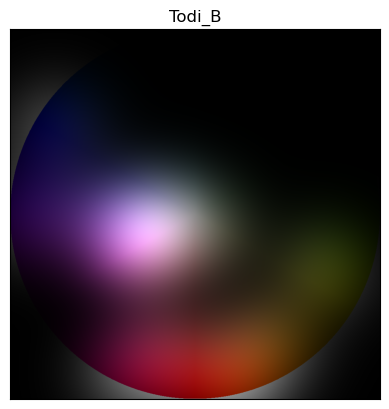

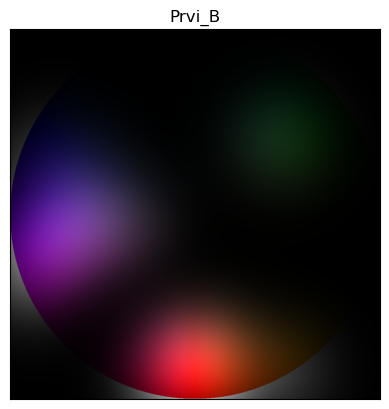

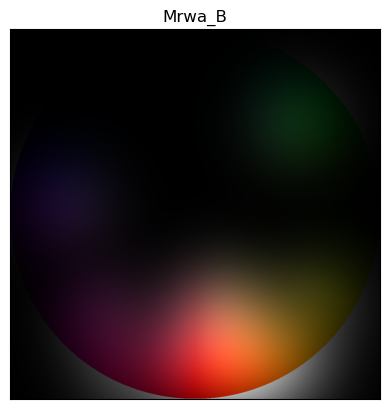

In [19]:
# Heat map plots per Thaat for Set B data using plotter function

for i in range(len(List)):
    plotter(1000,List_B[i],Labels_B[i])

In [20]:
# Mean RGB values per thaat in 3 cases (combined, set A, set B) for plotting them as single colour gradient (like white above)

RGB = [[x.mean(0), x.mean(0)] for x in List]
RGB_A = [[x.mean(0), x.mean(0)] for x in List_A]
RGB_B = [[x.mean(0), x.mean(0)] for x in List_B]

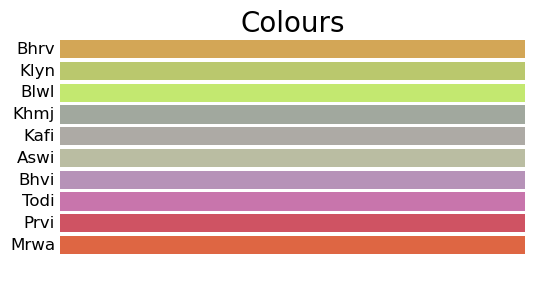

In [21]:
plot_color_gradients(RGB, Labels, 'Colours')

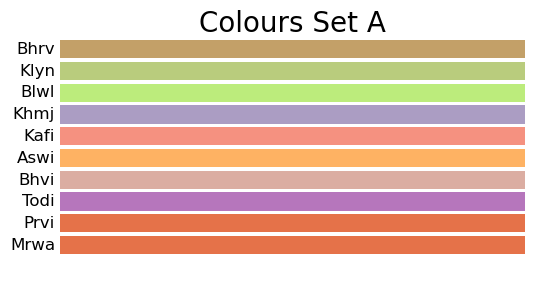

In [22]:
plot_color_gradients(RGB_A, Labels, 'Colours Set A')

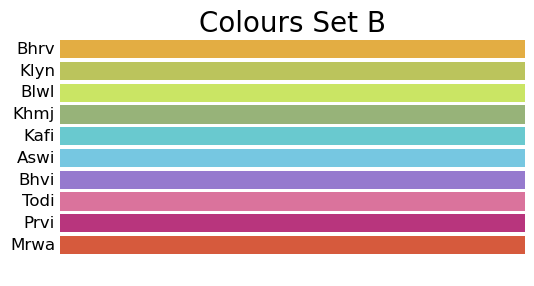

In [23]:
plot_color_gradients(RGB_B, Labels, 'Colours Set B')